In [1]:
import pandas as pd
import numpy as np
import datetime
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

# Set so jupyter displays all columns
pd.set_option('display.max_columns', False)


In [2]:
os.chdir('../data/interim')

In [3]:
os.listdir()

['.gitkeep', 'joined data post-markdowns.csv', 'joined data pre-markdowns.csv']

In [4]:
df1 = pd.read_csv('joined data pre-markdowns.csv')
df2 = pd.read_csv('joined data post-markdowns.csv')

In [5]:
df3 = df1.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [6]:
s1d1 = df3.loc[df3['Store'] == 1].loc[df3['Dept']==1]

In [7]:
s1d1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-01-10,20094.19,False,71.89,2.603,211.671989,7.838,A,151315
2935,1,1,2010-02-04,57258.43,False,62.27,2.719,210.820450,7.808,A,151315
5884,1,1,2010-02-07,16333.14,False,80.91,2.669,211.223533,7.787,A,151315
8801,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
11778,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315


In [8]:
s1d1 = s1d1.drop(['Store', 'Dept', 'Type', 'Size'], axis=1)

In [9]:
s1d1.set_index('Date', inplace=True)

In [10]:
df4 = df3.groupby(['Store', 'Date'])[['Weekly_Sales']].sum().sort_index()

In [11]:
df4.unstack(level=0).head()

Weekly_Sales                                                                                                                                             ...                                                                                                                                                   
Store                1           2          3           4          5           6          7          8          9           10          11          12          13  ...         33         34          35         36         37         38          39          40          41         42         43         44         45
Date                                                                                                                                                                ...                                                                                                                                                   
2010-01-10   1453329.50  1827440.43  358784.10  1842821.02  283178.12  1328468.89  448998.73  804105.49  495692.19  1645892.97  1182490.46   850936.26  1765584.48  ...  224294.39  865709.11   771065.21  422169.47  529877.93  360256.58  1219583.91   891152.33  1109216.35  481523.93  657108.77  300152.45  690007.76
2010-02-04   1594968.28  2066187.72  423294.40  1979247.12  331406.00  1770333.90  561145.14  914500.91  545206.32  2138651.97  1446210.26  1011822.30  2142482.14  ...  274634.52  979428.66  1189556.47  435972.82  540189.70  368929.55  1463942.62  1041202.13  1168826.39  505907.41  650102.80  286197.50  877235.96
2010-02-07   1492418.14  2003940.64  381151.72  1881337.21  305993.27  1759777.25  575570.77  852333.75  528832.54  1845893.87  1302600.14   951957.31  2018314.71  ...  267495.76  919229.36  1245827.08  434252.15  498292.53  361181.48  1352547.70  1087578.78  1273279.79  507168.80  667353.79  300628.19  800147.84
2010-02-19   1611968.17  2124451.54  421642.19  2049860.26  303447.57  1567138.07  506760.54  963960.37  511327.90  2113432.58  1503298.70  1095421.65  1970274.64  ...  296850.83  983963.07  1270658.64  470281.03  510382.50  327237.92  1230591.97   916289.20  1052034.74  508794.87  658997.55  267956.30  841264.04
2010-02-26   1409727.59  1865097.27  407204.86  1925728.84  270281.63  1432953.21  496083.24  847592.11  473773.27  2006774.96  1336404.65  1048617.17  1817850.32  ...  284052.77  905756.13  1020651.74  447519.44  513615.82  334222.73  1168582.02   863917.41   991941.73  491510.58  618702.79  273079.07  741891.65

[5 rows x 45 columns]

In [12]:
sns.set()

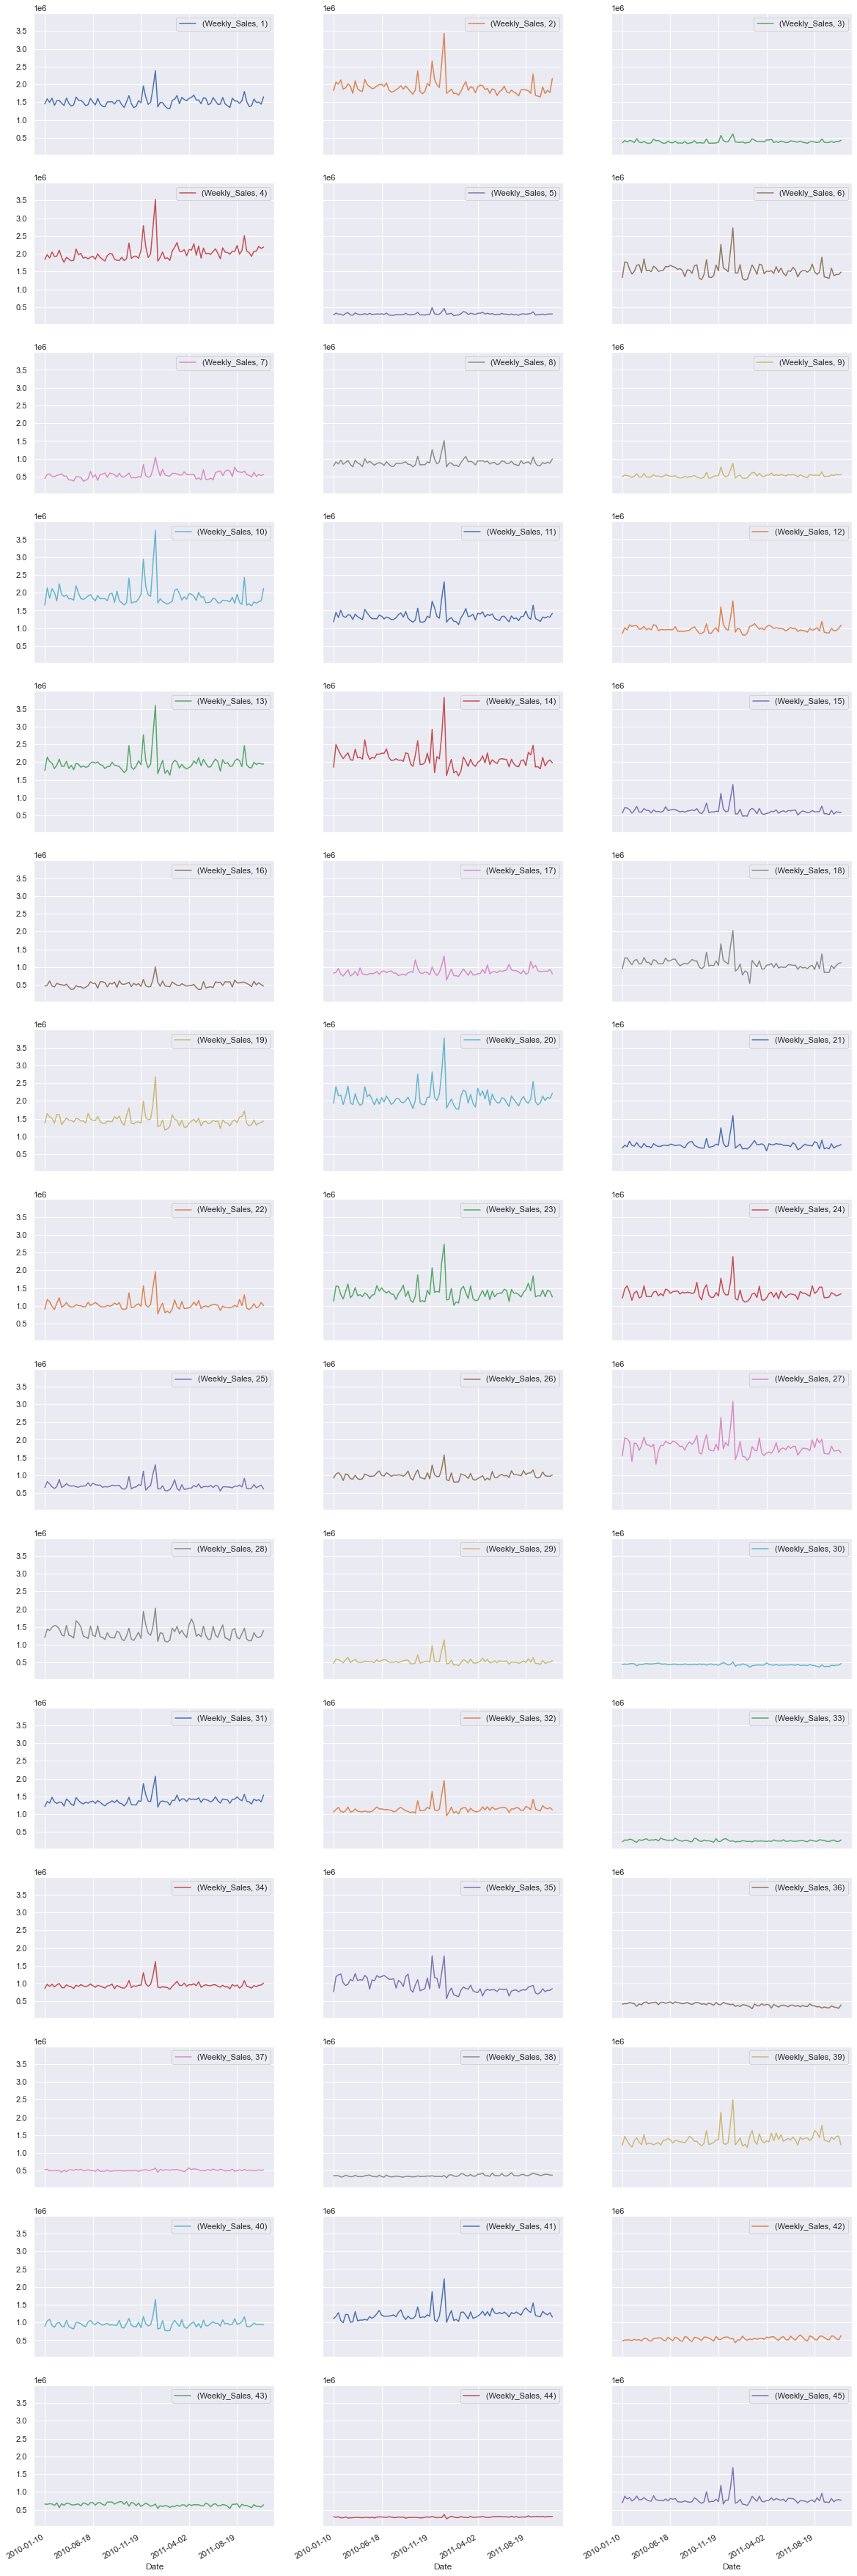

In [13]:
# Plot store-wide weekly sales for all stores

df4.unstack(level=0).plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
plt.show()
plt.close()

In [14]:
df5 = df2

In [15]:
df5.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2011-11-03,21280.40,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
1,1,2,2011-11-03,48465.72,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
2,1,3,2011-11-03,10689.97,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
3,1,4,2011-11-03,35229.12,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
4,1,5,2011-11-03,23704.37,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315


In [16]:
#Converting boolean values in holiday column to integers
df5['IsHoliday'] = df5['IsHoliday'].astype(int)

In [97]:
#Converting A/B distinction in Type into integers
df5['Type'] = df5['Type'].replace({'A':0, 'B':1, 'C':2})

In [98]:
df5['Type'] = df5['Type'].astype(int)

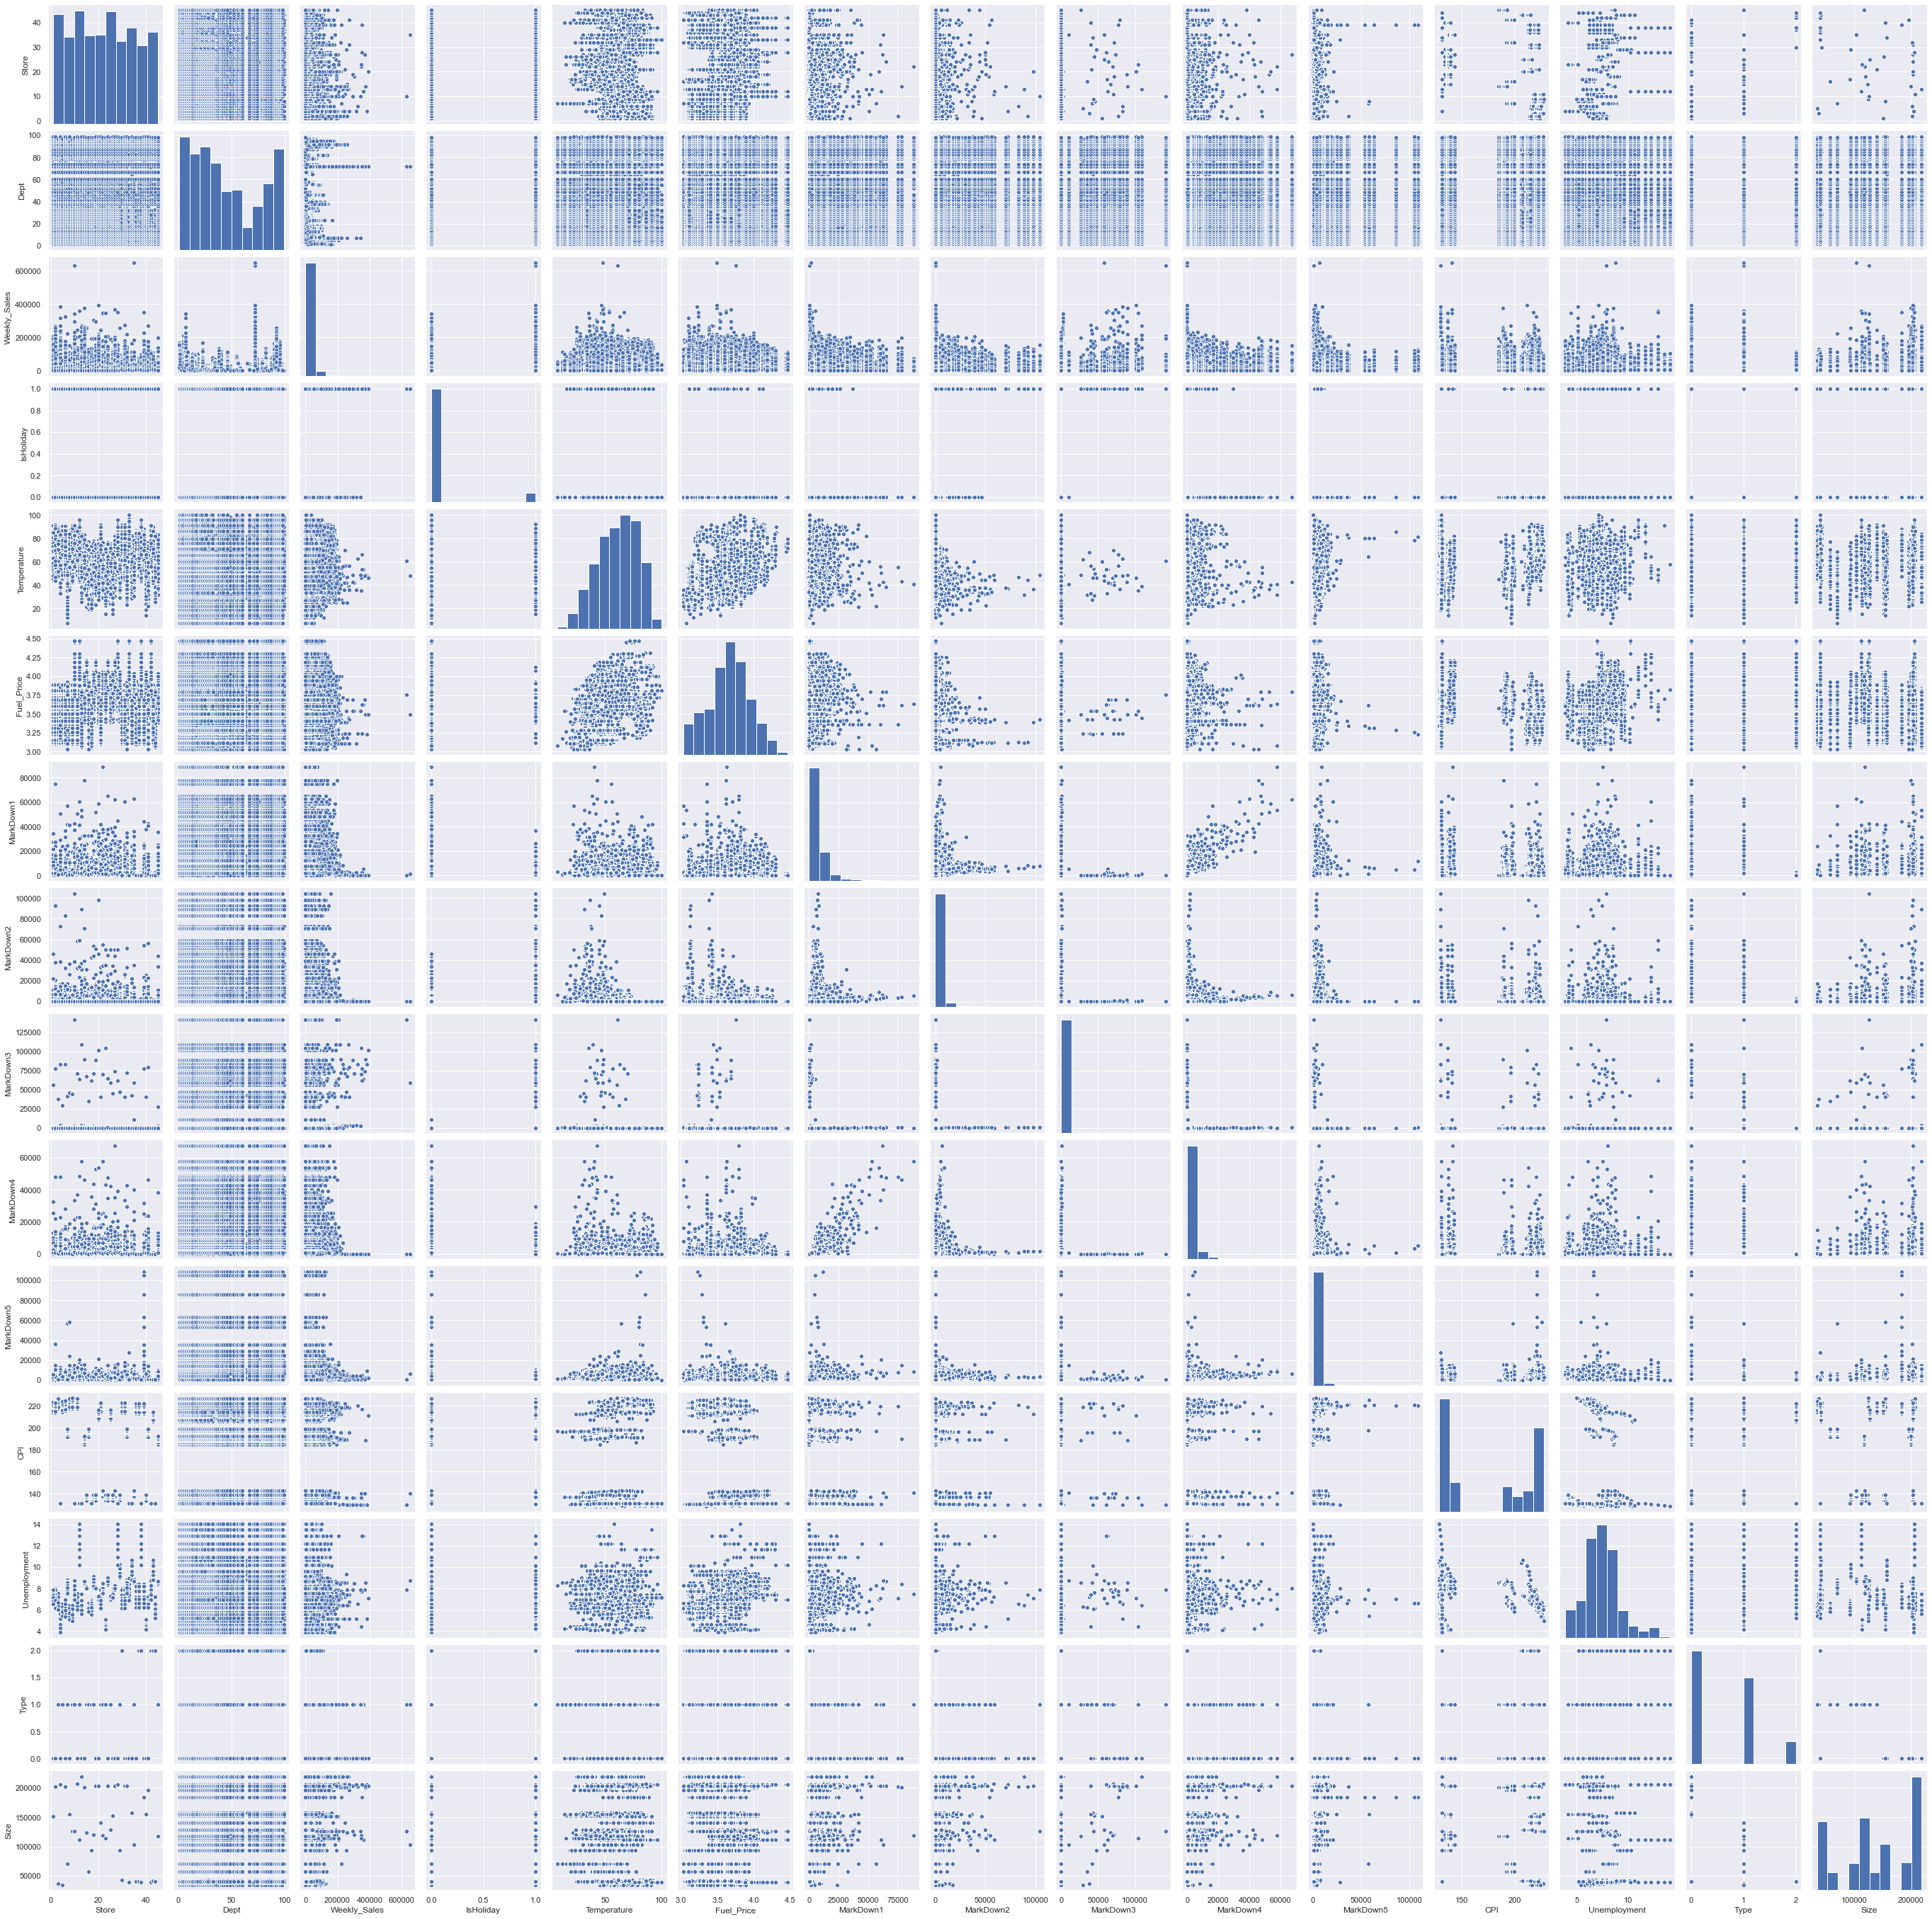

In [99]:
_ = sns.pairplot(df5)
plt.show()
plt.close()

Takeaways from the pairplots:
 - MarkDown 3 seems to have the biggest impact on weekly sales.
 - Other MarkDowns seem to have an effect on weekly sales, but not incredibly drastic.
 - isHoliday does not seem to have as big of impact as initially expected.
 - MarkDown 4 and MarkDown 1 are related. Could potentially drop one of them.
 - Extreme temperatures (hot or cold) seem to impact weekly_sales negatively.
 - MarkDown 3 seems related to whether it's a holiday. Most instances of MarkDown 3 are on holidays. The impact of MarkDown 3 is related to holiday status.
 - Perhaps MarkDown 3 is tied to holiday related discounts. 
 - MarkDown 2 is also correlated with holiday status, but the impact of MarkDown 2 is much less than of MarkDown 3.
 - There is a linear correlation between store size and weekly sales
 - CPI and Unemployment don't seem to have a big impact on weekly sales
 - MarkDown 3 almost never occurs simultaneously with other MarkDowns
 - A couple specific departments have significantly higher sales than others
 

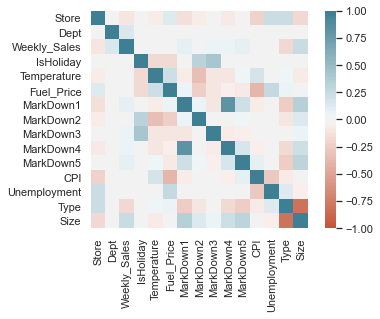

In [100]:
corr = df5.corr()

_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)



plt.show()
plt.close()

In [101]:
df5pos = df5[df5.Weekly_Sales > 0]

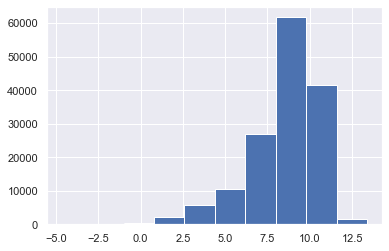

In [102]:
_ = plt.hist(np.log(df5pos.Weekly_Sales))

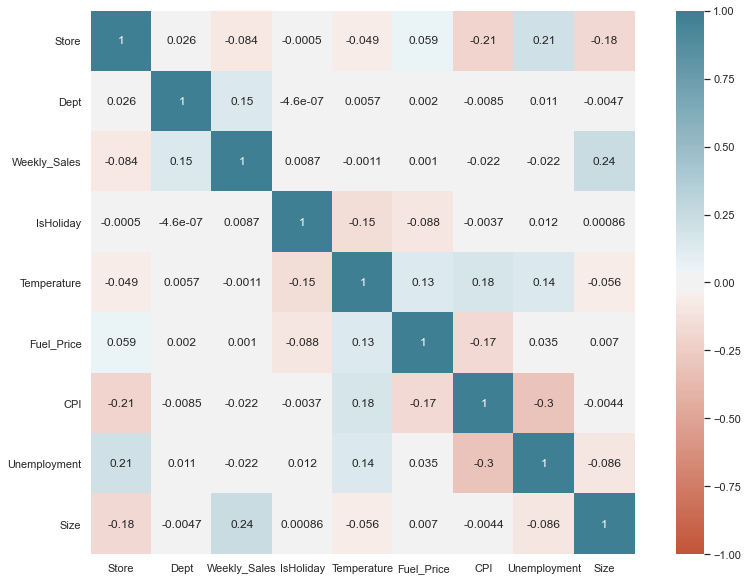

In [103]:
corr = df3.corr()

_, ax = plt.subplots(figsize=(15,10))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, ax=ax)



plt.show()
plt.close()

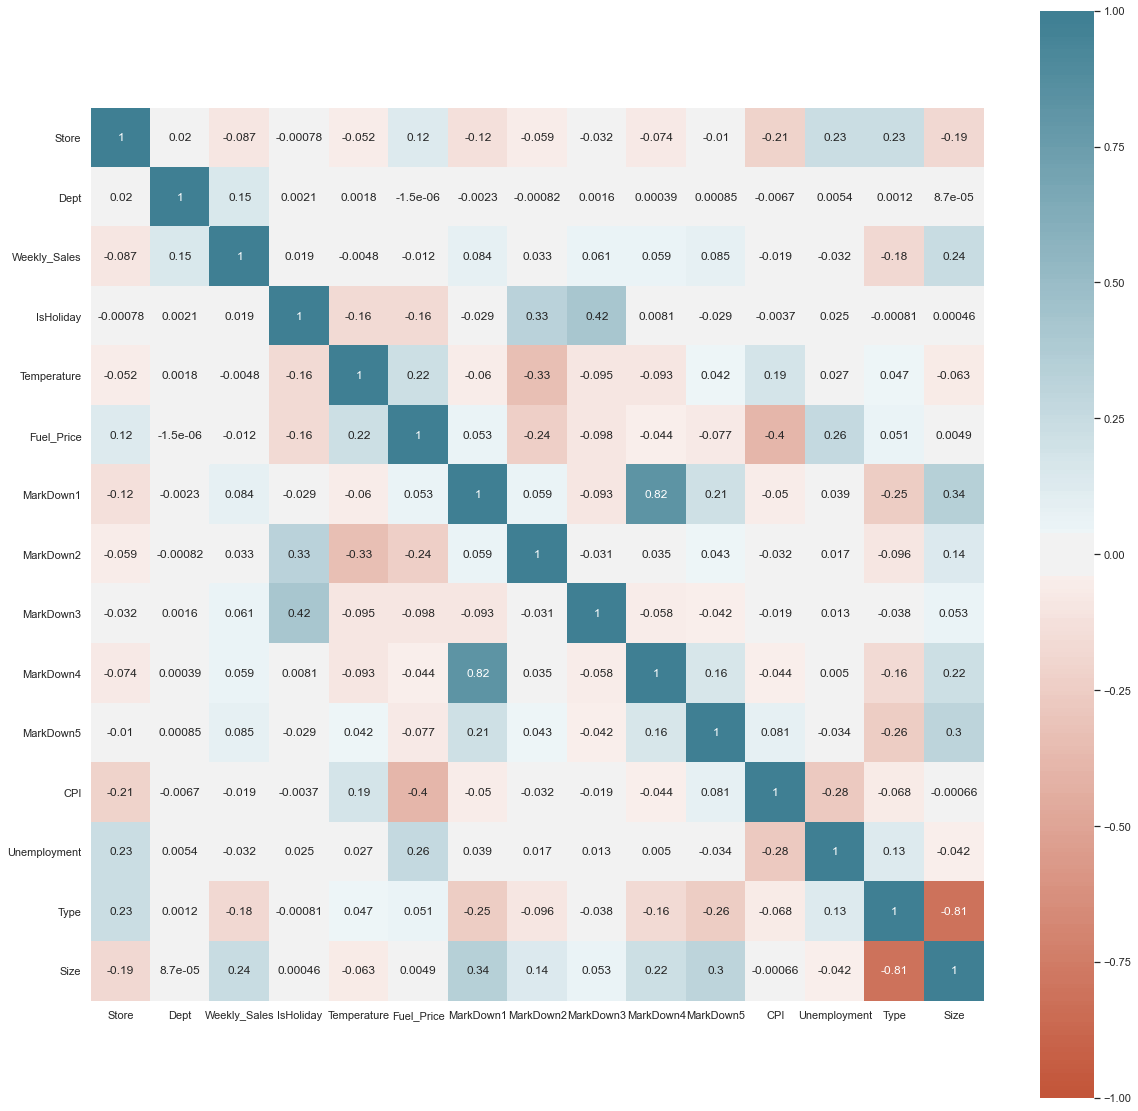

In [104]:
corr = df5.corr()

_, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax, annot=True)



plt.show()
plt.close()

You should try logistic regression to predict weekly sales. Try out different models and see what variables are impactful and what variables are not. If it's possible to build a successfully predictive model without markdown explanatory variables, then we should do that because it gives us access to train the entire data set rather than the half that contains markdown data. Would also be worth seeing if date has anything to do with it. We could create a categorical month feature which can be used to see if the month affects sales as well.